In [3]:
!apt-get update 
!apt-get install openjdk-8-jdk-headless -qq > /dev/null 
!wget -q http://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz 
!tar xf spark-3.2.1-bin-hadoop2.7.tgz 
!pip install -q findspark 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [806 kB]
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelea

In [4]:
#set environment variables
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [6]:
!ls

covid_19_202001_202007.csv  spark-3.2.1-bin-hadoop2.7
sample_data		    spark-3.2.1-bin-hadoop2.7.tgz


In [7]:
!ls sample_data

anscombe.json		      covid_19_202001_202007.csv  README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


**1.	Import the data using inferred schema. Log the time taken to import.**



In [8]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [9]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

sparksess = SparkSession.builder.getOrCreate()
sparksess

In [ ]:
df.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Date: string (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Recovered: integer (nullable = true)
 |-- Active: integer (nullable = true)
 |-- WHO Region: string (nullable = true)



In [11]:
# import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 

# File location and type
path = '/content/sample_data/covid_19_202001_202007.csv'
file_type = "csv"

# Logging the time taken 
import time
logtime = time.time()

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# Import csv. The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(path)

df.head() #first row object
logtime

print(f"The total time taken to import: {time.time() - logtime}")

The total time taken to import: 0.9829614162445068


2.	Define the schema and then import the data using your defined schema. Log the time taken to import

In [44]:
#Custom Schema

from pyspark.sql.types import *
path = '/content/sample_data/covid_19_202001_202007.csv'

# Logging the time taken 
import time
logtime = time.time()

# Defining the schema
definedSchema = StructType([
StructField('Province_State', StringType(),False),
StructField('Country_Region',StringType(),False),
StructField('Lat', FloatType(),False),
StructField('Long', FloatType(), False),
StructField('Date', DateType(), False),
StructField('Confirmed', IntegerType(), False),
StructField('Deaths', IntegerType(), False),
StructField('Recovered', IntegerType(), False),
StructField('Active', IntegerType(), False),
StructField('WHORegion', StringType(), False),
])
df_newschema = spark.read.csv(path,  header=True, nullValue='NA', schema=definedSchema)
df_newschema.show()
print(f"The total time taken to import: {time.time() - logtime}")

+--------------------+-------------------+---------+---------+----------+---------+------+---------+------+--------------------+
|      Province_State|     Country_Region|      Lat|     Long|      Date|Confirmed|Deaths|Recovered|Active|           WHORegion|
+--------------------+-------------------+---------+---------+----------+---------+------+---------+------+--------------------+
|                null|        Afghanistan| 33.93911| 67.70995|2020-01-22|        0|     0|        0|     0|Eastern Mediterra...|
|                null|            Albania|  41.1533|  20.1683|2020-01-22|        0|     0|        0|     0|              Europe|
|                null|            Algeria|  28.0339|   1.6596|2020-01-22|        0|     0|        0|     0|              Africa|
|                null|            Andorra|  42.5063|   1.5218|2020-01-22|        0|     0|        0|     0|              Europe|
|                null|             Angola| -11.2027|  17.8739|2020-01-22|        0|     0|       

**3.	Would you recommend creating a schema first before importing the data? Why?  ** **bold text**                                         
Answer: Yes, creating a schema before importing the data is recommended as it helps in getting the correct order of fields and also helps in defining the appropriate data types for the fields. 
In importing the data, system takes default datatypes which creates discrepancy. As seen in the importing the data, it has taken the Date column's datatype as StringType which is incorrect, it should be DateType.

**4.	Provide summary statistics on the dataset**

In [45]:
df_newschema.describe().show()

+-------+--------------+--------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+---------------+
|summary|Province_State|Country_Region|               Lat|             Long|         Confirmed|           Deaths|        Recovered|           Active|      WHORegion|
+-------+--------------+--------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+---------------+
|  count|         14664|         49068|             49068|            49068|             49068|            49068|            49068|            49068|          49068|
|   mean|          null|          null|21.433730432456823|23.52823646406561| 16884.90425531915|884.1791595337083|7915.713479253282| 8085.01161653216|           null|
| stddev|          null|          null|24.950319775168307|70.44273974868658|127300.20527228026|6313.584410596534|54800.91873054013|76258.90302550694|           null|
|   

**5.	For top 10 countries suffering from covid-19, plot the line charts to show the deaths from Jan 22, 2020 to July 27, 2020**

In [47]:
df_newschema.createOrReplaceTempView("New_df")

In [48]:
total_deaths = spark.sql("SELECT Country_Region, SUM(Deaths) FROM New_df WHERE Date between '2020-01-22' and '2020-07-27' GROUP BY Country_Region ORDER BY sum(Deaths) DESC LIMIT 10") ;
total_deaths.show()

+--------------+-----------+
|Country_Region|sum(Deaths)|
+--------------+-----------+
|            US|   11011411|
|United Kingdom|    3997775|
|        Brazil|    3938034|
|         Italy|    3707717|
|        France|    3048524|
|         Spain|    3033030|
|        Mexico|    1728277|
|         India|    1111831|
|          Iran|    1024136|
|       Belgium|     963679|
+--------------+-----------+



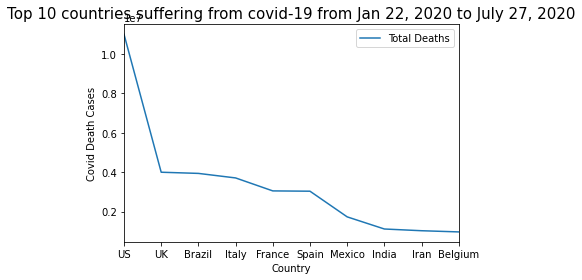

In [68]:
from IPython.core.pylabtools import figsize

import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
df_newschema = total_deaths.toPandas()
df_newschema.plot(x = 'Country_Region', y = 'sum(Deaths)' )
plt.title('Top 10 countries suffering from covid-19 from Jan 22, 2020 to July 27, 2020', fontsize = 15)
plt.xlabel('Country', fontsize = 10)
plt.ylabel('Covid Death Cases', fontsize = 10)
plt.xlim(0,9)
plt.legend(['Total Deaths'])
plt.xticks(np.arange(0,10),['US','UK','Brazil','Italy','France','Spain','Mexico','India','Iran','Belgium'],color='black')
plt.show()

**6.	Plot the recovery rate (recovered cases / confirmed cases) for the period Jan 22, 2020 to July 27, 2020. Which 5 countries have a relatively higher recovery rate?**

In [61]:
recovery = spark.sql("SELECT Country_Region, SUM(Recovered)/SUM(Confirmed) FROM New_df WHERE Date between '2020-01-22' and '2020-07-27'  GROUP BY Country_Region ORDER BY SUM(Recovered)/SUM(Confirmed) DESC LIMIT 5") ;
recovery.show()

+--------------+---------------------------------+
|Country_Region|(sum(Recovered) / sum(Confirmed))|
+--------------+---------------------------------+
| Liechtenstein|                0.915563713650855|
|     Greenland|               0.9104180491041804|
|       Iceland|               0.8593886304979638|
|      Thailand|               0.8522155257320743|
|   New Zealand|               0.8498741327090165|
+--------------+---------------------------------+



<Figure size 1440x360 with 0 Axes>

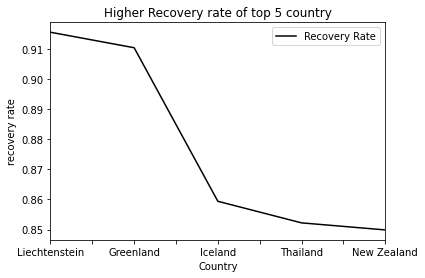

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
recovery_chart = recovery.toPandas()

fig = plt.figure(figsize = (20, 5))
recovery_chart.plot(x = 'Country_Region',y = '(sum(Recovered) / sum(Confirmed))',color = 'Black')
plt.title("Higher Recovery rate of top 5 country")
plt.ylabel("recovery rate")
plt.xlabel("Country")
plt.xlim(0,4)
plt.legend(['Recovery Rate'])

**7.	As of July 27, 2020, aggregate the confirmed cases, deaths, recovered cases and active cases group by WHO region.**

In [69]:
aggregated_cases=spark.sql("SELECT Date,WHORegion,AVG(Confirmed),AVG(Deaths),AVG(Recovered),AVG(Active) From New_df where date <= '2020-07-27' GROUP BY Date,WHORegion")
aggregated_cases.show()

+----------+--------------------+------------------+-------------------+-------------------+------------------+
|      Date|           WHORegion|    avg(Confirmed)|        avg(Deaths)|     avg(Recovered)|       avg(Active)|
+----------+--------------------+------------------+-------------------+-------------------+------------------+
|2020-02-27|     Western Pacific| 1468.490909090909|  50.27272727272727|              577.2| 841.0181818181818|
|2020-06-19|Eastern Mediterra...| 39895.90909090909|  888.6363636363636| 23972.409090909092|15034.863636363636|
|2020-06-22|              Europe|        32150.8125|          2426.4125|           17862.55|          11861.85|
|2020-01-29|              Europe|             0.125|                0.0|                0.0|             0.125|
|2020-02-21|Eastern Mediterra...|1.3181818181818181|0.18181818181818182|0.18181818181818182|0.9545454545454546|
|2020-02-25|Eastern Mediterra...| 6.818181818181818| 0.7272727272727273|0.18181818181818182| 5.909090909

**8.	Which 5 countries have the highest growth rate on confirmed cases 3 months after the 1st positive case detected within the country?**

In [70]:
highest_growth_rate=spark.sql("SELECT Date,WHORegion,AVG(Confirmed),AVG(Deaths),AVG(Recovered),AVG(Active) From New_df where date <= '2020-07-27' GROUP BY Date,WHORegion")
highest_growth_rate.show()

+----------+--------------------+------------------+-------------------+-------------------+------------------+
|      Date|           WHORegion|    avg(Confirmed)|        avg(Deaths)|     avg(Recovered)|       avg(Active)|
+----------+--------------------+------------------+-------------------+-------------------+------------------+
|2020-02-27|     Western Pacific| 1468.490909090909|  50.27272727272727|              577.2| 841.0181818181818|
|2020-06-19|Eastern Mediterra...| 39895.90909090909|  888.6363636363636| 23972.409090909092|15034.863636363636|
|2020-06-22|              Europe|        32150.8125|          2426.4125|           17862.55|          11861.85|
|2020-01-29|              Europe|             0.125|                0.0|                0.0|             0.125|
|2020-02-21|Eastern Mediterra...|1.3181818181818181|0.18181818181818182|0.18181818181818182|0.9545454545454546|
|2020-02-25|Eastern Mediterra...| 6.818181818181818| 0.7272727272727273|0.18181818181818182| 5.909090909

**9.	For step 7, export the results to a JSON file**

In [71]:
aggregated_cases.write.json("AggregatedCasesJson.json")